In [21]:
## Import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [22]:
## Load data
sirs_demo = pd.read_excel('../data/Dartmouth Data Set- SIRS .xlsx', sheet_name = 'Demographics')
sirs_crisis = pd.read_excel('../data/Dartmouth Data Set- SIRS .xlsx', sheet_name = 'Emergency Crisis Services')

In [23]:
# Examining top race categories
race_value_counts = sirs_demo.Race.value_counts()
print(race_value_counts)

# Examining top race categories (by proprotion)
race_norm = sirs_demo['Race'].value_counts(normalize = True)

# Calculating cumulative sum of proportions and showing top 30
race_norm_cumsum = race_norm.cumsum().head(30)
print(race_norm_cumsum)

Race
White                                        2980
Black or African American                     994
Unknown, not collected                        277
Other: Hispanic                               191
Asian                                         147
                                             ... 
Other: Ecuadorian                               1
Other: Pakistani                                1
Other: Pakistani-Muslim                         1
Other: White and Black or African America       1
Other: mexican                                  1
Name: count, Length: 162, dtype: int64
Race
White                                                0.597673
Black or African American                            0.797032
Unknown, not collected                               0.852587
Other: Hispanic                                      0.890895
Asian                                                0.920377
Other                                                0.927597
Black or African American, Wh

In [24]:
# Taking top 96% of data
def categorize_race(race):
    categories = {
        'White': ['White', 'Other: Middle Eastern']

    }

    for category, labels in categories.items():
        if race in labels:
            return category
    return 'Non-White'

In [25]:
sirs_demo['race_clean'] = sirs_demo['Race'].apply(categorize_race)

In [26]:
sirs_demo['race_clean'].value_counts()

race_clean
White        2984
Non-White    2002
Name: count, dtype: int64

In [30]:
# Merging data frames
crisis_select = pd.merge(sirs_crisis, sirs_demo, how = 'left', left_on = 'Individual ID', right_on = 'Local ID')

In [31]:
crisis_select['Reason for Contact'].value_counts().cumsum()

Reason for Contact
Aggression (physical, verbal, property destruction, threats)                                                                                                                                         3759
Mental health symptoms                                                                                                                                                                               5652
Aggression (physical, verbal, property destruction, threats), Family needs assistance                                                                                                                6949
Aggression (physical, verbal, property destruction, threats), Mental health symptoms                                                                                                                 8012
Family needs assistance                                                                                                                                                      

In [32]:
# Recategorizing reasons for contact 
crisis_select['is_suicidal'] = np.where(crisis_select['Reason for Contact'].str.contains('suicidal', case = False, na = False), True, False)
crisis_select['is_aggression'] = np.where(crisis_select['Reason for Contact'].str.contains('aggression', case = False, na = False), True, False)
crisis_select['is_mh_symp'] = np.where(crisis_select['Reason for Contact'].str.contains('Mental health symptoms', 
                                                                                        case = False, na = False), True, False)
crisis_select['fam_needs'] = np.where(crisis_select['Reason for Contact'].str.contains('Family needs assistance', case = False, na = False),
                                     True, False)

crisis_select

,Individual ID,Date/Time of Contact,Source of Contact,Reason for Contact,Type of Emergency Response,Total episode length (initial call to disposition),Total response time (initial call to arrival on-site),Travel Time,Police Response,If Police Responded,...,Current IEP,Current 504 Plan,School Setting,Custody Status,Child Lives With,race_clean,is_suicidal,is_aggression,is_mh_symp,fam_needs
0,11153125,2016-08-16 08:40:00,Case Manager/Service Coordinator,"At risk of losing placement, Other, Self-injur...",Phone consultation only,15.0,NaN,NaN,No,NaN,...,No,No,NaN,NaN,NaN,White,False,False,False,False
1,11153125,2018-04-27 15:00:00,Case Manager/Service Coordinator,"Mental health symptoms, Self-injurious",In-person: Emergency room,60.0,240.0,60.0,No,NaN,...,No,No,NaN,NaN,NaN,White,False,False,True,False
2,11153125,2018-06-05 16:00:00,Residential provider - Community,"Mental health symptoms, Suicidal ideation/beha...",Other: phone and email,120.0,NaN,NaN,No,NaN,...,No,No,NaN,NaN,NaN,White,True,False,True,False
3,11158347,2015-06-01 14:00:00,Family member,"Diagnosis and treatment plan assistance, Other...",Phone consultation only,254.0,NaN,NaN,No,NaN,...,No,No,NaN,NaN,NaN,White,False,False,False,False
4,11158347,2015-06-01 16:00:00,Family member,"Aggression (physical, verbal, property destruc...",Phone consultation only,70.0,NaN,NaN,No,NaN,...,No,No,NaN,NaN,NaN,White,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18163,108482C,2021-12-03 14:05:00,School,"Aggression (physical, verbal, property destruc...",Other: In-person School,40.0,12.0,12.0,No,NaN,...,Yes: 1969-12-31,No,Separate classroom,Child protective services custody,Other: Currently at TRACK,Non-White,False,True,True,False
18164,817731C,2021-12-04 14:21:00,Family member,"Family needs assistance, Mental health symptoms",Telehealth response,120.0,NaN,NaN,Yes,Assist on Site,...,NaN,NaN,NaN,NaN,NaN,White,False,False,True,True
18165,471473,2021-12-19 15:00:00,Self,Mental health symptoms,Phone consultation only,20.0,NaN,NaN,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,False,True,False
18166,780879W,2021-12-17 11:00:00,Case Manager/Service Coordinator,"At risk of losing placement, Decrease in abili...",In-person: Emergency room,210.0,150.0,30.0,Yes,Transport to ED,...,No,No,NaN,NaN,NaN,Non-White,True,False,True,False


In [33]:
march_13 = datetime.date(2020, 3, 13)

In [34]:
# Step 1: Extract and aggregate START encounters by date and race
start_encounters_by_race = crisis_select.groupby([crisis_select['Status Date'].dt.date, 'race_clean', 'is_suicidal', 
                                                    'is_aggression', 'is_mh_symp']).size().reset_index(name='START Encounters')

by_aggression = start_encounters_by_race[start_encounters_by_race['is_aggression'] == True]
by_aggression

,Status Date,race_clean,is_suicidal,is_aggression,is_mh_symp,START Encounters
0,2012-05-21,White,False,True,False,1
1,2013-05-09,White,False,True,True,1
2,2013-05-09,White,True,True,True,1
5,2014-07-01,White,False,True,False,1
6,2014-07-01,White,False,True,True,8
...,...,...,...,...,...,...
3567,2021-12-15,Non-White,False,True,False,1
3569,2021-12-15,White,False,True,False,4
3570,2021-12-15,White,False,True,True,1
3573,2021-12-16,White,False,True,False,13


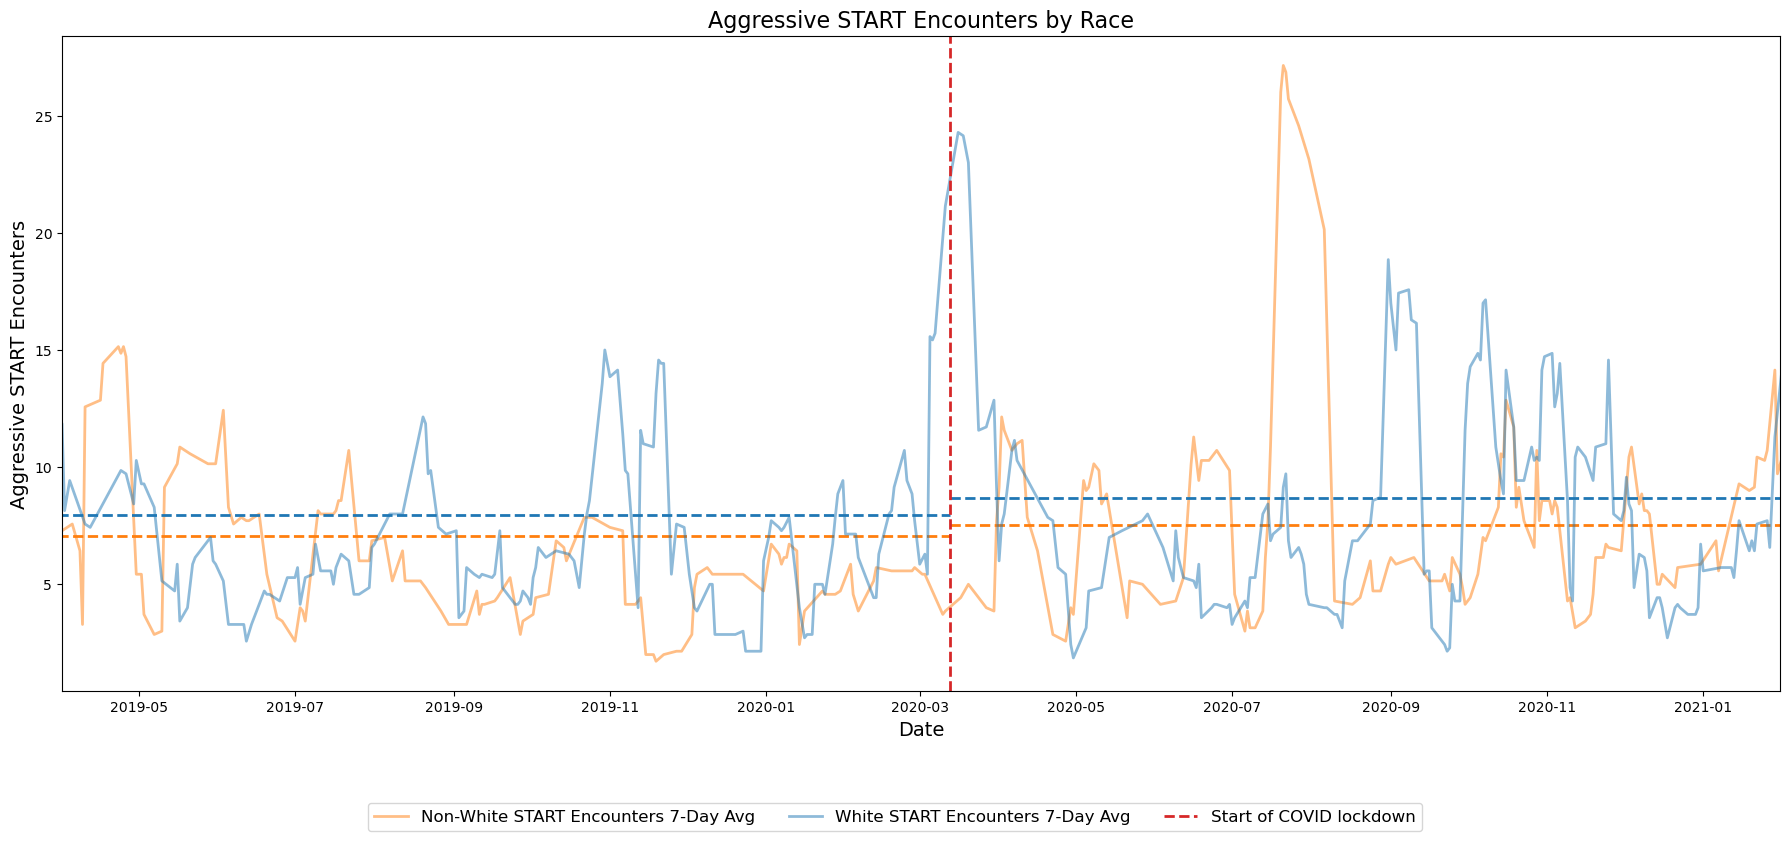

In [35]:
# Step 2: Define the race and colors for the plot
races = sirs_demo['race_clean'].unique()
race_colors = {
    'White': 'tab:blue',
    'Non-White': 'tab:orange'
}

# Initialize the plot
fig, ax1 = plt.subplots(figsize=(18, 8))

for race in races:
    race_data = by_aggression[by_aggression['race_clean'] == race]
    race_data = race_data.groupby('Status Date')['START Encounters'].sum().reset_index()

    merged_data = race_data[['Status Date', 'START Encounters']]
    merged_data['START Encounters Rolling Avg'] = merged_data['START Encounters'].rolling(window=7).mean()

    pre_covid_avg = merged_data[merged_data['Status Date'] < march_13]['START Encounters'].mean()
    post_covid_avg = merged_data[merged_data['Status Date'] >= march_13]['START Encounters'].mean()
    
    color = race_colors.get(race, 'gray')


    ax1.plot(merged_data['Status Date'], merged_data['START Encounters Rolling Avg'], 
             label=f'{race} START Encounters 7-Day Avg', color=color, linewidth=2, alpha=0.5)
    
    # Add horizontal lines for average encounters before and after COVID only on their side of the vertical line
    ax1.hlines(pre_covid_avg, merged_data['Status Date'].min(), march_13, color=color, linestyle='--', linewidth=2)
    ax1.hlines(post_covid_avg, march_13, merged_data['Status Date'].max(), color=color, linestyle='--', linewidth=2)

# Add vertical line on March 13
march_13 = datetime.date(2020, 3, 13)
ax1.axvline(march_13, color='tab:red', linestyle='--', label='Start of COVID lockdown', linewidth=2)

# Set labels and title
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Aggressive START Encounters', fontsize=14)
ax1.set_xlim(pd.to_datetime('2019-04-01'), pd.to_datetime('2021-01-31'))
plt.title('Aggressive START Encounters by Race', fontsize=16)

# Move legend outside of the plot
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=4, fontsize=12)

fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [36]:
by_aggression

,Status Date,race_clean,is_suicidal,is_aggression,is_mh_symp,START Encounters
0,2012-05-21,White,False,True,False,1
1,2013-05-09,White,False,True,True,1
2,2013-05-09,White,True,True,True,1
5,2014-07-01,White,False,True,False,1
6,2014-07-01,White,False,True,True,8
...,...,...,...,...,...,...
3567,2021-12-15,Non-White,False,True,False,1
3569,2021-12-15,White,False,True,False,4
3570,2021-12-15,White,False,True,True,1
3573,2021-12-16,White,False,True,False,13


In [37]:
by_aggression['Status Date'] = pd.to_datetime(by_aggression['Status Date'])

by_aggression['ym'] = by_aggression['Status Date'].dt.strftime('%Y-%m')

by_aggression

# Group by 'Status Date' and 'race_clean' and count occurrences
grouped = by_aggression.groupby(['ym', 'race_clean']).size().unstack(fill_value=0)

# Rename the columns for better clarity
grouped = grouped.rename(columns={'White': 'White Count', 'Non-White': 'Non-White Count'})

# If you want to fill in missing columns for consistency, add the missing ones with zero counts
if 'White Count' not in grouped.columns:
    grouped['White Count'] = 0
if 'Non-White Count' not in grouped.columns:
    grouped['Non-White Count'] = 0

# Reset the index to make 'Status Date' a column again
grouped = grouped.reset_index()

grouped

/var/folders/83/t3_xb4cx3dj64hsn0rxjvd500000gn/T/ipykernel_59288/3565209254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_aggression['Status Date'] = pd.to_datetime(by_aggression['Status Date'])
/var/folders/83/t3_xb4cx3dj64hsn0rxjvd500000gn/T/ipykernel_59288/3565209254.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_aggression['ym'] = by_aggression['Status Date'].dt.strftime('%Y-%m')


race_clean,ym,Non-White Count,White Count
0,2012-05,0,1
1,2013-05,0,2
2,2014-07,0,3
3,2014-09,2,0
4,2014-10,0,2
...,...,...,...
73,2021-08,19,42
74,2021-09,31,34
75,2021-10,18,28
76,2021-11,21,36


In [38]:
# Create column for White - Non-White disparity
grouped['race_disparity'] = grouped['White Count'] - grouped['Non-White Count']


# Change to datetime
grouped['ym_dt'] = pd.to_datetime(grouped['ym'])

grouped

race_clean,ym,Non-White Count,White Count,race_disparity,ym_dt
0,2012-05,0,1,1,2012-05-01
1,2013-05,0,2,2,2013-05-01
2,2014-07,0,3,3,2014-07-01
3,2014-09,2,0,-2,2014-09-01
4,2014-10,0,2,2,2014-10-01
...,...,...,...,...,...
73,2021-08,19,42,23,2021-08-01
74,2021-09,31,34,3,2021-09-01
75,2021-10,18,28,10,2021-10-01
76,2021-11,21,36,15,2021-11-01


In [39]:
start_date = pd.Timestamp(datetime.date(2019, 3, 1))
end_date = pd.Timestamp(datetime.date(2021, 12, 1))
covid = datetime.date(2021, 3, 13)

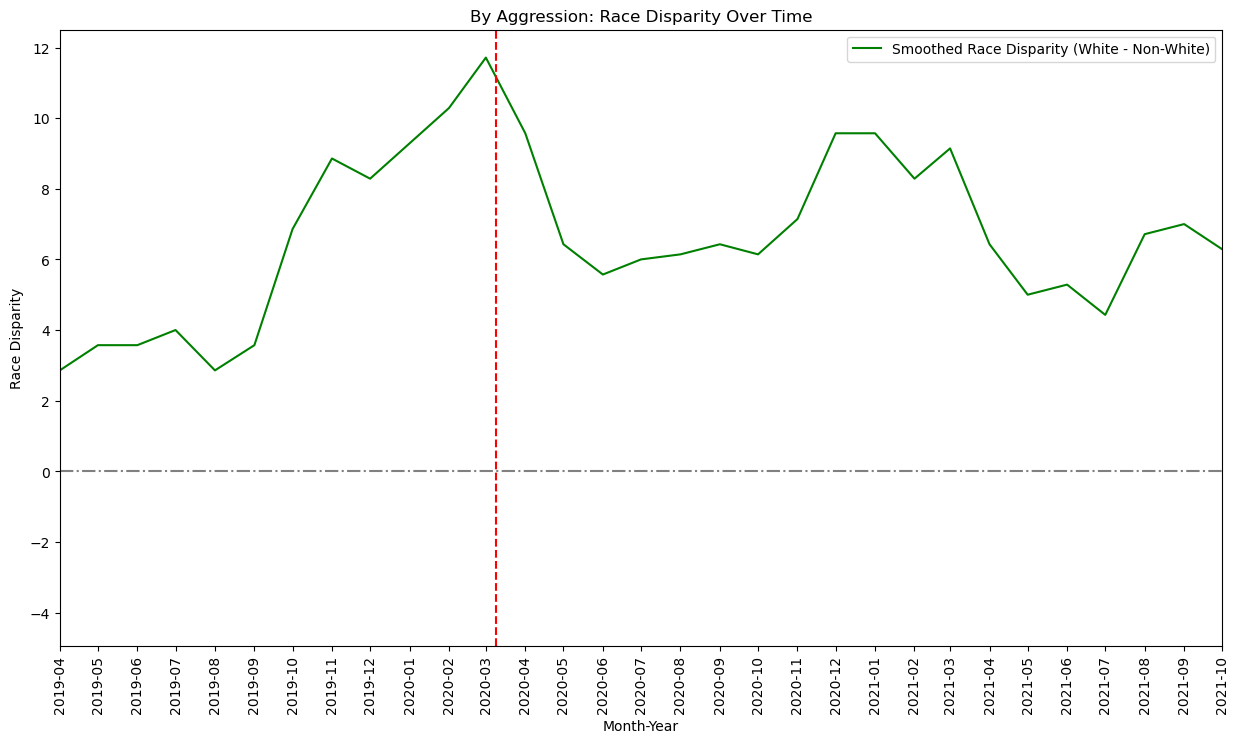

In [40]:
# Smooth the 'race_disparity' data by applying a rolling mean with a window size of 7
smoothed_disparity = grouped['race_disparity'].rolling(window=7).mean()

# Create a figure and axes with the desired size
fig, ax = plt.subplots(figsize=(15, 8))

# Plot the original 'race_disparity' data
#ax.plot(grouped['ym_datetime'], grouped['race_disparity'], label='Original Race Disparity', color = 'pink')

# Plot the smoothed disparity data
ax.plot(grouped['ym_dt'], smoothed_disparity, label='Smoothed Race Disparity (White - Non-White)', color = 'green')



# Add labels and title
ax.set_xlabel('Month-Year')
ax.set_ylabel('Race Disparity')
ax.set_title('By Aggression: Race Disparity Over Time')

# Explicitly set x-axis ticks
ax.set_xticks(grouped['ym'])
ax.set_xticklabels(grouped['ym'], rotation=90)

start_date = pd.Timestamp('2019-04-01')
end_date = pd.Timestamp('2021-10-01')
ax.set_xlim(start_date, end_date)



# Add horizontal line at y = 0
ax.axhline(y=0, color='gray', linestyle='-.')

# # Averages pre/post COVID
# ax.axhline(y=pre_covid_avg, xmin=xmin, xmax=march_13, 
#            color='orange', linestyle='--', label='Pre-COVID Mean')

# ax.axhline(y=post_covid_avg, xmin=march_13, xmax=xmax,
#            color='purple', linestyle='--', label='Post-COVID Mean')




# Add vertical line at COVID start
ax.axvline(x=pd.to_datetime('2020-03-09'), color='red', linestyle='--')

# Add legend
ax.legend()

plt.show()